In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def rrt_simplified(target_pos, current_pos, obstacles, target_distance, generate_num=6):
    if clear_path(target_pos, current_pos, obstacles):
        # print('path clear between robot and ball')
        return target_pos
    #else:
        # print('path between robot and ball not clear')
    best_target = current_pos
    heading_options = np.random.random((generate_num,)) * np.pi * 2
    #heading_options = np.array([0])
    for i in heading_options:
        #generate target_point at desired angle, distance
        potential_target = current_pos + np.array([target_distance*np.cos(i), target_distance*np.sin(i)])
        #see if there is a clear path between target point and current point
        #check to see if path gets closest to goal
        #clear_path(potential_target, current_pos, obstacles)
        #plt.plot(potential_target[0], potential_target[1], 'b*')
        if clear_path(potential_target, current_pos, obstacles):
          plt.plot(potential_target[0], potential_target[1], 'g*')
          #print('clear path between potential and current')
          if np.linalg.norm(potential_target - target_pos) < np.linalg.norm(best_target - target_pos):
            best_target = potential_target
          #print('best target updated')
    return best_target

def clear_path(target_pos, current_pos, obstacles):
    AB = target_pos - current_pos
    #print('AB', AB)
    for o in obstacles:
        AC = o[:2] - current_pos
        AD = AB * np.dot(AC, AB) / np.dot(AB, AB)
        D = current_pos + AD
        #plt.plot(D[0], D[1], 'g*')
        # print('AC', AC)
        # print('AD', AD)
        # print('D', D)
        # print('distance between D and obstacle center', np.linalg.norm(D - o[:2]))
        if np.linalg.norm(D - o[:2]) <= o[2]:
            return False
    return True

In [3]:
def plot_circle(x, y, size, color="-b"):  # pragma: no cover
        deg = list(range(0, 360, 5))
        deg.append(0)
        xl = [x + size * math.cos(np.deg2rad(d)) for d in deg]
        yl = [y + size * math.sin(np.deg2rad(d)) for d in deg]
        plt.plot(xl, yl, color)

[-500    0]


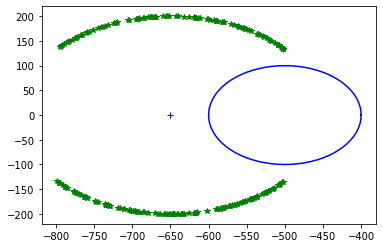

In [4]:
start_pos = np.array([-650, 0])
ball_pos = np.array([0, 0])
obstacles = np.array([[-500, 0, 100]])
target = rrt_simplified(target_pos=ball_pos, 
                        current_pos=start_pos, 
                        obstacles=obstacles, 
                        target_distance=200, 
                        generate_num=400)
plt.plot(start_pos[0], start_pos[1], 'b+')
#plt.plot(ball_pos, 'g+')
plt.plot(target[0], target[1], 'r+')
for o in obstacles:
  print(o[:2])
  plot_circle(o[0], o[1], o[2])
plt.show()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


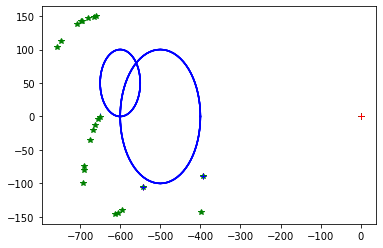

In [5]:
start_pos = np.array([-650, 0])
ball_pos = np.array([0, 0])
obstacles = np.array([[-500, 0, 100],
                      [-600, 50, 50]])

iters = 5
while (iters > 0):
  target = rrt_simplified(target_pos=ball_pos, 
                          current_pos=start_pos, 
                          obstacles=obstacles, 
                          target_distance=150, 
                          generate_num=40)
  plt.plot(start_pos[0], start_pos[1], 'b+')
  plt.plot(ball_pos, 'g+')
  plt.plot(target[0], target[1], 'r+')
  for o in obstacles:
    plot_circle(o[0], o[1], o[2])

  start_pos = target
  iters -= 1

plt.show()

In [6]:
def shoot_path():

SyntaxError: ignored